In [1]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, Activation, BatchNormalization, Add, AveragePooling2D, Input, ZeroPadding2D, concatenate, GlobalAveragePooling2D, Lambda
from keras.initializers import glorot_uniform, Constant
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import os
import pickle

Using TensorFlow backend.


In [2]:
def conv2d_bn(X, num_filters, filter_size, strides=1, padding="same", activation=None, name=None, kernel_initializer=None, bias_initializer=None):
    X = Conv2D(num_filters, filter_size, strides=strides, padding=padding,
               kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)(X)
    X = BatchNormalization(axis=3, scale=False)(X)
    if activation:
        try:
            X = Activation(activation)(X)
        except Exception as e:
            raise ValueError("Wrong activation parameter!")
        return X

In [3]:
def Stem(input_layer, kernel_initializer=None, bias_initializer=None, name=None):
    X = conv2d_bn(input_layer, 32, (3, 3), strides=2, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X = conv2d_bn(X, 32, (3, 3), strides=1, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)

    X = conv2d_bn(X, 64, (3, 3), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X1 = MaxPool2D((3, 3), strides=(2, 2), padding="valid")(X)
    
    X2 = conv2d_bn(X, 96, (3, 3), strides=2, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X = concatenate([X1, X2], axis=3)
    
    X1 = conv2d_bn(X, 64, (1, 1), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)

    X1 = conv2d_bn(X1, 96, (3, 3), strides=1, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)

    X2 = conv2d_bn(X, 64, (1, 1), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X2 = conv2d_bn(X2, 64, (7, 1), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)

    X2 = conv2d_bn(X2, 64, (1, 7), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)

    X2 = conv2d_bn(X2, 96, (3, 3), strides=1, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X = concatenate([X1, X2], axis=3)
    
    X1 = conv2d_bn(X, 192, (3, 3), strides=2, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X2 = MaxPool2D((3, 3), strides=(2, 2), padding="valid")(X)
    
    X = concatenate([X1, X2], axis=3, name=name)
    
    return X

In [4]:
def Inception_V4_A(X, kernel_initializer=None, bias_initializer=None, name=None):
    X1 = AveragePooling2D((3, 3), strides=(1, 1), padding="same")(X)
    X1 = conv2d_bn(X1, 96, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X2 = conv2d_bn(X, 96, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X3 = conv2d_bn(X, 64, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X3 = conv2d_bn(X3, 96, (3, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X4 = conv2d_bn(X, 64, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X4 = conv2d_bn(X4, 96, (3, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X4 = conv2d_bn(X4, 96, (3, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X = concatenate([X1, X2, X3, X4], axis=3, name=name)
    
    return X

In [5]:
def Inception_V4_B(X, kernel_initializer=None, bias_initializer=None, name=None):
    X1 = AveragePooling2D((3, 3), strides=(1, 1), padding="same")(X)
    X1 = conv2d_bn(X1, 128, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X2 = conv2d_bn(X, 384, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X3 = conv2d_bn(X, 64, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X3 = conv2d_bn(X3, 96, (3, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X4 = conv2d_bn(X, 64, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X4 = conv2d_bn(X4, 96, (3, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X4 = conv2d_bn(X4, 96, (3, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X = concatenate([X1, X2, X3, X4], axis=3, name=name)
    
    return X

In [6]:
def Inception_V4_C(X, kernel_initializer=None, bias_initializer=None, name=None):
    X1 = AveragePooling2D((3, 3), strides=(1, 1), padding="same")(X)
    X1 = conv2d_bn(X1, 256, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X2 = conv2d_bn(X, 256, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X3 = conv2d_bn(X, 384, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X3_1 = conv2d_bn(X3, 256, (1, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X3_2 = conv2d_bn(X3, 256, (3, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X4 = conv2d_bn(X, 384, (1, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X4 = conv2d_bn(X4, 448, (1, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X4 = conv2d_bn(X4, 512, (3, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X4_1 = conv2d_bn(X4, 256, (3, 1), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    X4_2 = conv2d_bn(X4, 256, (1, 3), activation="relu", kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
    
    X = concatenate([X1, X2, X3_1, X3_2, X4_1, X4_2], axis=3, name=name)
    
    return X

In [7]:
def Reduction_A(X, kernel_initializer=None, bias_initializer=None, name=None):
    X1 = MaxPool2D((3, 3), strides=(2, 2), padding="valid")(X)
    
    X2 = conv2d_bn(X, 384, (3, 3), strides=2, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X3 = conv2d_bn(X, 192, (1, 1), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    X3 = conv2d_bn(X3, 224, (3, 3), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    X3 = conv2d_bn(X3, 256, (3, 3), strides=2, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X = concatenate([X1, X2, X3], axis=3, name=name)
    
    return X

In [8]:
def Reduction_B(X, kernel_initializer=None, bias_initializer=None, name=None):
    X1 = MaxPool2D((3, 3), strides=(2, 2), padding="valid")(X)
    
    X2 = conv2d_bn(X, 192, (1, 1), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    X2 = conv2d_bn(X2, 192, (3, 3), strides=2, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X3 = conv2d_bn(X, 256, (1, 1), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    X3 = conv2d_bn(X3, 256, (1, 7), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    X3 = conv2d_bn(X3, 320, (7, 1), strides=1, padding="same", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    X3 = conv2d_bn(X3, 320, (3, 3), strides=2, padding="valid", activation="relu", kernel_initializer=kernel_initializer,
               bias_initializer=bias_initializer)
    
    X = concatenate([X1, X2, X3], axis=3, name=name)
    
    return X

In [9]:
def Inception_V4(size=(299, 299, 3), N_Classes=5, kernel_initializer=None, bias_initializer=None):
    input_layer = Input(shape=size)
    
    X = Stem(input_layer, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Stem")
    
    X = Inception_V4_A(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_A_1")
    X = Inception_V4_A(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_A_2")
    X = Inception_V4_A(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_A_3")
    X = Inception_V4_A(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_A_4")
    
    X = Reduction_A(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Reduction_A")
    
    X = Inception_V4_B(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_B_1")
    X = Inception_V4_B(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_B_2")
    X = Inception_V4_B(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_B_3")
    X = Inception_V4_B(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_B_4")
    X = Inception_V4_B(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_B_5")
    X = Inception_V4_B(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_B_6")
    X = Inception_V4_B(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_B_7")
    
    X = Reduction_B(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Reduction_B")
    
    X = Inception_V4_C(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_C_1")
    X = Inception_V4_C(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_C_2")
    X = Inception_V4_C(X, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, name="Block_C_3")
    
    X = GlobalAveragePooling2D(name="Global_Average_Pooling")(X)
    
    X = Dropout(.8)(X)
    
    X = Dense(N_Classes, activation="softmax", name="final_output")(X)
    
    model  = Model(input_layer, X, name="Inception_V4")
    return model

In [22]:
nn = Inception_V4(size=(299, 299, 3), N_Classes=5)
# nn.summary()
nn.compile(loss=["categorical_crossentropy"], optimizer="SGD", metrics=["accuracy"])

In [23]:
params = [{'samplewise_center':1, 'samplewise_std_normalization':1}, {'featurewise_center':1, 'featurewise_std_normalization':1}, {'rescale':1./255.}]
label = ["samplewise center and std", "featurewise center and std", "rescale by 255"]
opt = "SGD"
num_epochs = 150

In [24]:
import math
import matplotlib.pyplot as plt

Found 975 images belonging to 5 classes.
Found 235 images belonging to 5 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 49 steps, validate for 12 steps

Epoch 00001: LearningRateScheduler setting learning rate to 0.02.
Epoch 1/150
49/49 [==============================] - 40s 810ms/step - loss: 1.7905 - accuracy: 0.3313 - val_loss: 60.7941 - val_accuracy: 0.2128

Epoch 00002: LearningRateScheduler setting learning rate to 0.02.
Epoch 2/150
49/49 [==============================] - 29s 598ms/step - loss: 1.4276 - accuracy: 0.5128 - val_loss: 10.1946 - val_accuracy: 0.2128

Epoch 00003: LearningRateScheduler setting learning rate to 0.02.
Epoch 3/150
49/49 [==============================] - 29s 597ms/step - loss: 1.0845 - accuracy: 0.6174 - val_loss: 1.5572 - val_accuracy: 0.3362

Epoch 00004: LearningRateScheduler setting learning rate to 0.019.
Epoch 4/150
49/49 [==============================] - 29s 597ms/step - loss: 0.9035 - accuracy: 0.7036 - val_loss: 1.5566 - 

49/49 [==============================] - 28s 581ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.5260 - val_accuracy: 0.8638

Epoch 00073: LearningRateScheduler setting learning rate to 0.007944286369164364.
Epoch 73/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.4117 - val_accuracy: 0.8851

Epoch 00074: LearningRateScheduler setting learning rate to 0.007944286369164364.
Epoch 74/150
49/49 [==============================] - 29s 582ms/step - loss: 0.0072 - accuracy: 0.9990 - val_loss: 0.4612 - val_accuracy: 0.8809

Epoch 00075: LearningRateScheduler setting learning rate to 0.007944286369164364.
Epoch 75/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.4403 - val_accuracy: 0.8809

Epoch 00076: LearningRateScheduler setting learning rate to 0.007547072050706145.
Epoch 76/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0037 - accuracy: 1.000

49/49 [==============================] - 29s 583ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5360 - val_accuracy: 0.8468

Epoch 00109: LearningRateScheduler setting learning rate to 0.005006881794849098.
Epoch 109/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6024 - val_accuracy: 0.8383

Epoch 00110: LearningRateScheduler setting learning rate to 0.005006881794849098.
Epoch 110/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0052 - accuracy: 0.9979 - val_loss: 0.4965 - val_accuracy: 0.8681

Epoch 00111: LearningRateScheduler setting learning rate to 0.005006881794849098.
Epoch 111/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.4969 - val_accuracy: 0.8681

Epoch 00112: LearningRateScheduler setting learning rate to 0.004756537705106643.
Epoch 112/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0030 - accuracy: 0

49/49 [==============================] - 29s 582ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.5007 - val_accuracy: 0.8638

Epoch 00145: LearningRateScheduler setting learning rate to 0.003155584295764536.
Epoch 145/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5069 - val_accuracy: 0.8638

Epoch 00146: LearningRateScheduler setting learning rate to 0.003155584295764536.
Epoch 146/150
49/49 [==============================] - 28s 581ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4957 - val_accuracy: 0.8638

Epoch 00147: LearningRateScheduler setting learning rate to 0.003155584295764536.
Epoch 147/150
49/49 [==============================] - 29s 583ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4880 - val_accuracy: 0.8553

Epoch 00148: LearningRateScheduler setting learning rate to 0.002997805080976309.
Epoch 148/150
49/49 [==============================] - 29s 582ms/step - loss: 0.0015 - accuracy: 1

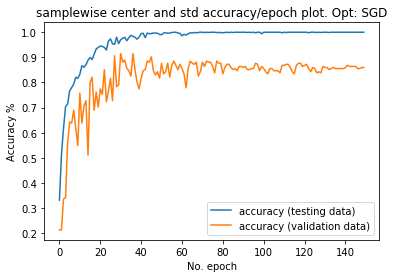

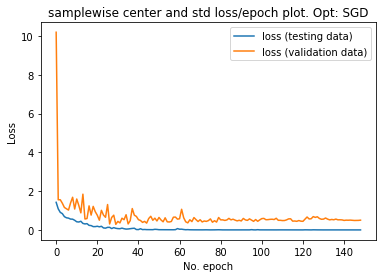

Found 975 images belonging to 5 classes.
Found 235 images belonging to 5 classes.


/home/alex/anaconda3/envs/tf36/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/alex/anaconda3/envs/tf36/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 49 steps, validate for 12 steps

Epoch 00001: LearningRateScheduler setting learning rate to 0.02.
Epoch 1/150


/home/alex/anaconda3/envs/tf36/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/alex/anaconda3/envs/tf36/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


49/49 [==============================] - 38s 780ms/step - loss: 2.2455 - accuracy: 0.2246 - val_loss: 782.4200 - val_accuracy: 0.2128

Epoch 00002: LearningRateScheduler setting learning rate to 0.02.
Epoch 2/150
49/49 [==============================] - 29s 597ms/step - loss: 2.1892 - accuracy: 0.2400 - val_loss: 223.7324 - val_accuracy: 0.2128

Epoch 00003: LearningRateScheduler setting learning rate to 0.02.
Epoch 3/150
49/49 [==============================] - 29s 596ms/step - loss: 2.2418 - accuracy: 0.2010 - val_loss: 66.0957 - val_accuracy: 0.2128

Epoch 00004: LearningRateScheduler setting learning rate to 0.019.
Epoch 4/150
49/49 [==============================] - 29s 595ms/step - loss: 2.0635 - accuracy: 0.2113 - val_loss: 53.7623 - val_accuracy: 0.2128

Epoch 00005: LearningRateScheduler setting learning rate to 0.019.
Epoch 5/150
49/49 [==============================] - 29s 597ms/step - loss: 2.0703 - accuracy: 0.2277 - val_loss: 5.4541 - val_accuracy: 0.2128

Epoch 00006: Le

49/49 [==============================] - 28s 579ms/step - loss: 1.4205 - accuracy: 0.4328 - val_loss: 1.6615 - val_accuracy: 0.2596

Epoch 00039: LearningRateScheduler setting learning rate to 0.012604988194492182.
Epoch 39/150
49/49 [==============================] - 28s 579ms/step - loss: 1.3433 - accuracy: 0.4533 - val_loss: 2.4961 - val_accuracy: 0.2426

Epoch 00040: LearningRateScheduler setting learning rate to 0.011974738784767574.
Epoch 40/150
49/49 [==============================] - 28s 579ms/step - loss: 1.2915 - accuracy: 0.4646 - val_loss: 4.0209 - val_accuracy: 0.1702

Epoch 00041: LearningRateScheduler setting learning rate to 0.011974738784767574.
Epoch 41/150
49/49 [==============================] - 28s 579ms/step - loss: 1.2704 - accuracy: 0.4656 - val_loss: 1.8669 - val_accuracy: 0.2085

Epoch 00042: LearningRateScheduler setting learning rate to 0.011974738784767574.
Epoch 42/150
49/49 [==============================] - 29s 595ms/step - loss: 1.2832 - accuracy: 0.492

49/49 [==============================] - 29s 594ms/step - loss: 0.6571 - accuracy: 0.7651 - val_loss: 0.9949 - val_accuracy: 0.6468

Epoch 00075: LearningRateScheduler setting learning rate to 0.007944286369164364.
Epoch 75/150
49/49 [==============================] - 28s 579ms/step - loss: 0.6620 - accuracy: 0.7559 - val_loss: 1.0055 - val_accuracy: 0.6723

Epoch 00076: LearningRateScheduler setting learning rate to 0.007547072050706145.
Epoch 76/150
49/49 [==============================] - 28s 579ms/step - loss: 0.5698 - accuracy: 0.7754 - val_loss: 1.7905 - val_accuracy: 0.4298

Epoch 00077: LearningRateScheduler setting learning rate to 0.007547072050706145.
Epoch 77/150
49/49 [==============================] - 28s 579ms/step - loss: 0.6019 - accuracy: 0.7785 - val_loss: 6.9584 - val_accuracy: 0.1830

Epoch 00078: LearningRateScheduler setting learning rate to 0.007547072050706145.
Epoch 78/150
49/49 [==============================] - 28s 579ms/step - loss: 0.6229 - accuracy: 0.771

49/49 [==============================] - 28s 577ms/step - loss: 0.2749 - accuracy: 0.9026 - val_loss: 0.8438 - val_accuracy: 0.7362

Epoch 00111: LearningRateScheduler setting learning rate to 0.005006881794849098.
Epoch 111/150
49/49 [==============================] - 29s 593ms/step - loss: 0.2491 - accuracy: 0.9087 - val_loss: 0.5579 - val_accuracy: 0.7872

Epoch 00112: LearningRateScheduler setting learning rate to 0.004756537705106643.
Epoch 112/150
49/49 [==============================] - 28s 577ms/step - loss: 0.3018 - accuracy: 0.8964 - val_loss: 0.8978 - val_accuracy: 0.7872

Epoch 00113: LearningRateScheduler setting learning rate to 0.004756537705106643.
Epoch 113/150
49/49 [==============================] - 28s 578ms/step - loss: 0.2889 - accuracy: 0.8892 - val_loss: 1.3730 - val_accuracy: 0.6979

Epoch 00114: LearningRateScheduler setting learning rate to 0.004756537705106643.
Epoch 114/150
49/49 [==============================] - 28s 577ms/step - loss: 0.2875 - accuracy: 0

49/49 [==============================] - 28s 578ms/step - loss: 0.1673 - accuracy: 0.9467 - val_loss: 0.9995 - val_accuracy: 0.7362

Epoch 00147: LearningRateScheduler setting learning rate to 0.003155584295764536.
Epoch 147/150
49/49 [==============================] - 28s 578ms/step - loss: 0.1671 - accuracy: 0.9436 - val_loss: 0.5543 - val_accuracy: 0.8255

Epoch 00148: LearningRateScheduler setting learning rate to 0.002997805080976309.
Epoch 148/150
49/49 [==============================] - 28s 578ms/step - loss: 0.1522 - accuracy: 0.9467 - val_loss: 0.6480 - val_accuracy: 0.7319

Epoch 00149: LearningRateScheduler setting learning rate to 0.002997805080976309.
Epoch 149/150
49/49 [==============================] - 28s 578ms/step - loss: 0.1458 - accuracy: 0.9600 - val_loss: 1.1966 - val_accuracy: 0.7404

Epoch 00150: LearningRateScheduler setting learning rate to 0.002997805080976309.
Epoch 150/150
49/49 [==============================] - 28s 577ms/step - loss: 0.1383 - accuracy: 0

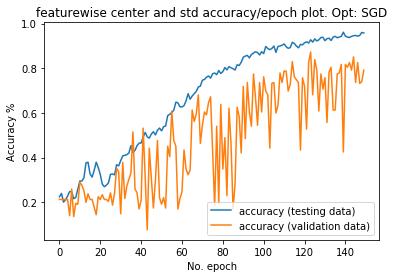

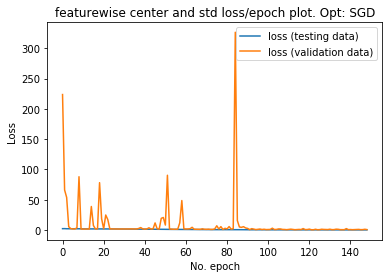

Found 975 images belonging to 5 classes.
Found 235 images belonging to 5 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 49 steps, validate for 12 steps

Epoch 00001: LearningRateScheduler setting learning rate to 0.02.
Epoch 1/150
49/49 [==============================] - 38s 779ms/step - loss: 2.3160 - accuracy: 0.1723 - val_loss: 406.7692 - val_accuracy: 0.2128

Epoch 00002: LearningRateScheduler setting learning rate to 0.02.
Epoch 2/150
49/49 [==============================] - 29s 592ms/step - loss: 2.1485 - accuracy: 0.2062 - val_loss: 321.7324 - val_accuracy: 0.2128

Epoch 00003: LearningRateScheduler setting learning rate to 0.02.
Epoch 3/150
49/49 [==============================] - 29s 592ms/step - loss: 2.0587 - accuracy: 0.2000 - val_loss: 178.7728 - val_accuracy: 0.2128

Epoch 00004: LearningRateScheduler setting learning rate to 0.019.
Epoch 4/150
49/49 [==============================] - 29s 593ms/step - loss: 2.1040 - accuracy: 0.2308 - val_loss: 2.037

49/49 [==============================] - 28s 578ms/step - loss: 0.5674 - accuracy: 0.7990 - val_loss: 2.0968 - val_accuracy: 0.4213

Epoch 00073: LearningRateScheduler setting learning rate to 0.007944286369164364.
Epoch 73/150
49/49 [==============================] - 28s 578ms/step - loss: 0.5569 - accuracy: 0.7990 - val_loss: 1.0959 - val_accuracy: 0.5362

Epoch 00074: LearningRateScheduler setting learning rate to 0.007944286369164364.
Epoch 74/150
49/49 [==============================] - 28s 580ms/step - loss: 0.5544 - accuracy: 0.7959 - val_loss: 1.1459 - val_accuracy: 0.5617

Epoch 00075: LearningRateScheduler setting learning rate to 0.007944286369164364.
Epoch 75/150
49/49 [==============================] - 29s 593ms/step - loss: 0.5649 - accuracy: 0.7918 - val_loss: 0.9200 - val_accuracy: 0.6000

Epoch 00076: LearningRateScheduler setting learning rate to 0.007547072050706145.
Epoch 76/150
49/49 [==============================] - 28s 580ms/step - loss: 0.5049 - accuracy: 0.817

49/49 [==============================] - 28s 580ms/step - loss: 0.3185 - accuracy: 0.8995 - val_loss: 1.0248 - val_accuracy: 0.6766

Epoch 00109: LearningRateScheduler setting learning rate to 0.005006881794849098.
Epoch 109/150
49/49 [==============================] - 28s 580ms/step - loss: 0.2488 - accuracy: 0.9190 - val_loss: 1.1789 - val_accuracy: 0.6213

Epoch 00110: LearningRateScheduler setting learning rate to 0.005006881794849098.
Epoch 110/150
49/49 [==============================] - 29s 595ms/step - loss: 0.2832 - accuracy: 0.9015 - val_loss: 0.6123 - val_accuracy: 0.7872

Epoch 00111: LearningRateScheduler setting learning rate to 0.005006881794849098.
Epoch 111/150
49/49 [==============================] - 28s 578ms/step - loss: 0.2262 - accuracy: 0.9241 - val_loss: 0.8527 - val_accuracy: 0.7234

Epoch 00112: LearningRateScheduler setting learning rate to 0.004756537705106643.
Epoch 112/150
49/49 [==============================] - 28s 578ms/step - loss: 0.2516 - accuracy: 0

49/49 [==============================] - 28s 579ms/step - loss: 0.1120 - accuracy: 0.9641 - val_loss: 0.6811 - val_accuracy: 0.8000

Epoch 00145: LearningRateScheduler setting learning rate to 0.003155584295764536.
Epoch 145/150
49/49 [==============================] - 28s 579ms/step - loss: 0.1374 - accuracy: 0.9549 - val_loss: 0.6596 - val_accuracy: 0.7745

Epoch 00146: LearningRateScheduler setting learning rate to 0.003155584295764536.
Epoch 146/150
49/49 [==============================] - 28s 580ms/step - loss: 0.1224 - accuracy: 0.9600 - val_loss: 0.5909 - val_accuracy: 0.7872

Epoch 00147: LearningRateScheduler setting learning rate to 0.003155584295764536.
Epoch 147/150
49/49 [==============================] - 28s 579ms/step - loss: 0.1222 - accuracy: 0.9631 - val_loss: 0.8575 - val_accuracy: 0.7745

Epoch 00148: LearningRateScheduler setting learning rate to 0.002997805080976309.
Epoch 148/150
49/49 [==============================] - 28s 579ms/step - loss: 0.1353 - accuracy: 0

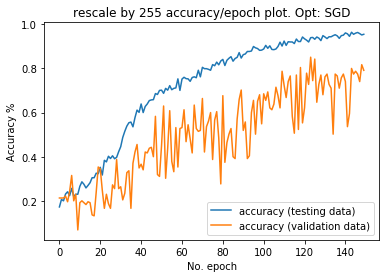

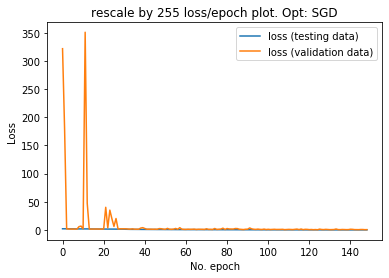

In [25]:
# os.mkdir("Weights/" + opt)
# os.mkdir("Hist/" + opt)
# os.mkdir("Plots/" + opt)
for i, el in enumerate(params):
    nn = Inception_V4(size=(299, 299, 3), N_Classes=5)
    
    initial_lrate = .03
    def decay(epoch, steps=100):
        init_rate = .02
        drop = .95
        epochs_drop = 4
        lrate = init_rate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lrate

    RMS = SGD(lr=initial_lrate)

    scheduler = LearningRateScheduler(decay, verbose=True)
    
    mcp_save = ModelCheckpoint("Weights/"+ opt + "/" + "Inception_V4_" + label[i].replace(" ", "_") + "_" + str(num_epochs) + "epochs_BEST.h5", save_best_only=True, monitor='val_loss', mode='min')

    nn.compile(loss=["categorical_crossentropy"], optimizer=RMS, metrics=["accuracy"])
    
    gen1 = image.ImageDataGenerator(zoom_range=.15, vertical_flip=True, horizontal_flip=True, brightness_range=[.15, 1], rotation_range=30, **params[i])
    gen2 = image.ImageDataGenerator(**params[i])
    
    train = gen1.flow_from_directory("/home/alex/CourseWork_2020/SelfCutData/SelfCutData/", batch_size=20, target_size=(299, 299), shuffle=1)
    test = gen2.flow_from_directory("/home/alex/CourseWork_2020/SelfCutData/Test/", batch_size=20, target_size=(299, 299), shuffle=1)
    
    hist = nn.fit_generator(train, validation_data=test, epochs=num_epochs, verbose=1, callbacks=[scheduler, mcp_save])
    
    nn.save_weights("Weights/"+ opt + "/" + "Inception_V4_" + label[i].replace(" ", "_") + "_" + str(num_epochs) + "epochs.h5")
    
    with open("Hist/"+ opt + "/" + "Inception_V4_" + label[i].replace(" ", "_") + "_" + str(num_epochs) + "epochs.pickle", "wb") as f:
        pickle.dump(hist.history, f)
        
    plt.plot(hist.history['accuracy'], label='accuracy (testing data)')
    plt.plot(hist.history['val_accuracy'], label='accuracy (validation data)')
    plt.title(label[i]+ " accuracy/epoch plot." + " Opt: {}".format(opt))
    plt.ylabel('Accuracy %')
    plt.xlabel('No. epoch')
    plt.legend(loc="lower right")
    plt.show()
    
    
    plt.plot(hist.history['loss'][1:], label='loss (testing data)')
    plt.plot(hist.history['val_loss'][1:], label='loss (validation data)')
    plt.title(label[i] + " loss/epoch plot." + " Opt: {}".format(opt))
    plt.ylabel('Loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper right")
    plt.show()
    

In [17]:
gen1 = image.ImageDataGenerator(samplewise_center=1, samplewise_std_normalization=1)

In [23]:
nn.load_weights("Weights/SGD/Inception_V4_samplewise_center_and_std_150epochs_BEST.h5")

In [24]:
Test = gen1.flow_from_directory("/home/alex/CourseWork_2020/SelfCutData/TestMod//", target_size=(299, 299), shuffle=False, batch_size=10)

Found 127 images belonging to 5 classes.


In [25]:
nn.evaluate_generator(Test, verbose=1)

  ...
    to  
  ['...']
13/13 [==============================] - 8s 612ms/step - loss: 0.1868 - accuracy: 0.9449


[0.18675860878563702, 0.9448819]

In [26]:
initial_lrate = 0.02

import math
def decay(epoch, steps=100):
    init_rate = initial_lrate
    drop = .97
    epochs_drop = 4
    lrate = init_rate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

RMS = SGD(lr=initial_lrate)

scheduler = LearningRateScheduler(decay, verbose=True)

nn.compile(loss=["categorical_crossentropy"], optimizer=RMS, metrics=["accuracy"])

In [27]:
gen1 = image.ImageDataGenerator(samplewise_center=1, samplewise_std_normalization=1, zoom_range=.15, vertical_flip=True, horizontal_flip=True, brightness_range=[.15, 1], rotation_range=30)
gen2 = image.ImageDataGenerator(samplewise_center=1, samplewise_std_normalization=1)

In [28]:
train = gen1.flow_from_directory("SelfCutData/SelfCutData/", batch_size=20, target_size=(299, 299), shuffle=1)
test = gen2.flow_from_directory("SelfCutData/Test/", batch_size=20, target_size=(299, 299), shuffle=1)

Found 975 images belonging to 5 classes.
Found 235 images belonging to 5 classes.


In [29]:
hist = nn.fit_generator(train, validation_data=test, epochs=300, verbose=1, callbacks=[scheduler])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 49 steps, validate for 12 steps

Epoch 00001: LearningRateScheduler setting learning rate to 0.02.
Epoch 1/300
49/49 [==============================] - 39s 791ms/step - loss: 1.7335 - accuracy: 0.3354 - val_loss: 17.3979 - val_accuracy: 0.2128

Epoch 00002: LearningRateScheduler setting learning rate to 0.02.
Epoch 2/300
49/49 [==============================] - 29s 582ms/step - loss: 1.4099 - accuracy: 0.5005 - val_loss: 1.6946 - val_accuracy: 0.2936

Epoch 00003: LearningRateScheduler setting learning rate to 0.02.
Epoch 3/300
49/49 [==============================] - 28s 582ms/step - loss: 1.2350 - accuracy: 0.5579 - val_loss: 3.2494 - val_accuracy: 0.3234

Epoch 00004: LearningRateScheduler setting learning rate to 0.0194.
Epoch 4/300
49/49 [==============================] - 29s 582ms/step - loss: 1.1620 - accuracy: 0.5815 - val_loss: 1.6174 - val_accuracy: 0.3532

Epoch 00005: LearningRateScheduler setting learning rate to 


Epoch 00037: LearningRateScheduler setting learning rate to 0.015204621173091301.
Epoch 37/300
49/49 [==============================] - 28s 570ms/step - loss: 0.1061 - accuracy: 0.9682 - val_loss: 0.8748 - val_accuracy: 0.7745

Epoch 00038: LearningRateScheduler setting learning rate to 0.015204621173091301.
Epoch 38/300
49/49 [==============================] - 28s 570ms/step - loss: 0.1232 - accuracy: 0.9641 - val_loss: 1.4044 - val_accuracy: 0.6638

Epoch 00039: LearningRateScheduler setting learning rate to 0.015204621173091301.
Epoch 39/300
49/49 [==============================] - 28s 569ms/step - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.7151 - val_accuracy: 0.8340

Epoch 00040: LearningRateScheduler setting learning rate to 0.014748482537898563.
Epoch 40/300
49/49 [==============================] - 28s 570ms/step - loss: 0.0397 - accuracy: 0.9836 - val_loss: 0.8581 - val_accuracy: 0.8085

Epoch 00041: LearningRateScheduler setting learning rate to 0.014748482537898563.
Epoch

KeyboardInterrupt: 

In [ ]:
nn.evaluate_generator(gen2.flow_from_directory("LISC_Database/Main_Dataset", target_size=(299, 299), shuffle=True, batch_size=25), verbose=1)

In [58]:
import matplotlib.pyplot as plt

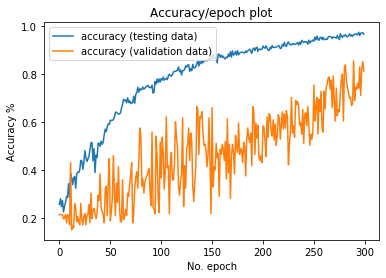

In [59]:
plt.plot(hist.history['accuracy'], label='accuracy (testing data)')
plt.plot(hist.history['val_accuracy'], label='accuracy (validation data)')
plt.title('Accuracy/epoch plot')
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [60]:
import pickle

In [65]:
with open("inceptionV4_training/inceptionV4_17_04_Samplewise_300epoch.pickle", 'wb') as f:
    pickle.dump(hist.history, f)

In [71]:
nn.save_weights("inceptionV4_training/inceptionV4_17_04_Samplewise_300epoch_weights.h5")